**Data Exploration**: Load the dataset into a DataFrame and display the first five rows. What insights can you gather about the structure and types of data present?


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Load the data
data = pd.read_csv("Mobiles_Dataset_2025.csv", sep = ",", encoding="ISO-8859-1")
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [32]:
# Convert to float
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [33]:
data.dtypes

Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object

**Data Cleaning**: Check for missing values in the dataset. Which columns contain missing values, and how would you handle them?

In [34]:
data.isna().sum()
# No missing data


Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [35]:
# Remane columns

data.rename(columns={"Mobile Weight" : "Mobile Weight (g)", "RAM" : "RAM (GB)", "Front Camera" : "Front Camera (MP)", "Back Camera": "Back Camera (MP)", 
                     "Battery Capacity": "Battery Capacity (mAh)", "Screen Size": "Screen Size (inches)",
                     "Launched Price (Pakistan)" : "P_Pakistan", "Launched Price (India)": "P_India", "Launched Price (China)" : "P_China", 
                     "Launched Price (USA)" : "P_USA", "Launched Price (Dubai)" : "P_Dubai"}, inplace=True)                    
data.head()

,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inches),P_Pakistan,P_India,P_China,P_USA,P_Dubai,Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [36]:
#data["Screen Size (inches)"] = data["Screen Size (inches)"].str.replace('inches', '').str.replace(',', '').astype(float)
data["Battery Capacity (mAh)"] = data["Battery Capacity (mAh)"].str.replace('mAh', '').str.replace(',', '').astype(int)
data["P_USA"] = data["P_USA"].str.replace('USD', '').str.replace(',', '').astype(float)
data["P_India"] = data["P_India"].str.replace('INR', '').str.replace(',', '').astype(float)
data["P_Dubai"] = data["P_Dubai"].str.replace('AED ', '').str.replace(',', '').astype(float)
data["P_China"] = data["P_China"].str.replace(r"[a-zA-Z₹$¥AED.,\s]", '', regex=True).str.replace(',', '').astype(float)
data.head()

,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inches),P_Pakistan,P_India,P_China,P_USA,P_Dubai,Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,"PKR 224,999",79999.0,5799.0,799.0,2799.0,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,"PKR 234,999",84999.0,6099.0,849.0,2999.0,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,"PKR 244,999",89999.0,6499.0,899.0,3199.0,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,"PKR 249,999",89999.0,6199.0,899.0,3199.0,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,"PKR 259,999",94999.0,6499.0,949.0,3399.0,2024


In [37]:
#data["P_Pakistan"] = data["P_Pakistan"].str.replace('PKR', '').str.replace(',', '').astype(float)
# Ensure column is string before applying str.replace()
data["P_Pakistan"] = data["P_Pakistan"].astype(str)
# Remove "PKR" and commas
data["P_Pakistan"] = data["P_Pakistan"].str.replace("PKR", "", regex=False).str.replace(",", "", regex=False)
# Convert to float, handling non-numeric values by setting them to NaN
#Handle non-numeric values like "Not available" → pd.to_numeric(..., errors="coerce") converts them to NaN.
data["P_Pakistan"] = pd.to_numeric(data["P_Pakistan"], errors="coerce")
data.head()



,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inches),P_Pakistan,P_India,P_China,P_USA,P_Dubai,Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,259999.0,94999.0,6499.0,949.0,3399.0,2024


In [38]:
data.dtypes

Company Name               object
Model Name                 object
Mobile Weight (g)          object
RAM (GB)                   object
Front Camera (MP)          object
Back Camera (MP)           object
Processor                  object
Battery Capacity (mAh)      int32
Screen Size (inches)       object
P_Pakistan                float64
P_India                   float64
P_China                   float64
P_USA                     float64
P_Dubai                   float64
Launched Year               int64
dtype: object

In [39]:
# CONVERT the launch prices to USD
data["P_Pakistan"] = data["P_Pakistan"] / 279.50
data["P_India"] = data["P_India"] / 86.65
data["P_China"] = data["P_China"] / 7.25
data["P_Dubai"] = data["P_Dubai"] / 3.67

# All Prices in USD
data.tail()

,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inches),P_Pakistan,P_India,P_China,P_USA,P_Dubai,Launched Year
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,12.1 inches,236.923077,276.964801,289.517241,280.0,280.381471,2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,12.1 inches,254.812165,300.046163,317.103448,300.0,299.455041,2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,7.6 inches,2164.576029,1904.200808,1930.896552,1899.0,1961.580381,2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,7.6 inches,1949.906977,2042.688979,2206.758621,1719.0,2097.820163,2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,7.6 inches,NaN,2319.665320,2482.620690,2259.0,2370.299728,2024


**Statistical Analysis**: Calculate the average RAM size and battery capacity of all smartphones in the dataset. What is the mean RAM and battery capacity?

In [40]:
data["RAM (GB)"] = data["RAM (GB)"].str.replace('GB', '').str.replace(',', '').str.split('/').str[0].astype(float)
data.head()

,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inches),P_Pakistan,P_India,P_China,P_USA,P_Dubai,Launched Year
0,Apple,iPhone 16 128GB,174g,6.0,12MP,48MP,A17 Bionic,3600,6.1 inches,805.005367,923.242931,799.862069,799.0,762.670300,2024
1,Apple,iPhone 16 256GB,174g,6.0,12MP,48MP,A17 Bionic,3600,6.1 inches,840.783542,980.946336,841.241379,849.0,817.166213,2024
2,Apple,iPhone 16 512GB,174g,6.0,12MP,48MP,A17 Bionic,3600,6.1 inches,876.561717,1038.649740,896.413793,899.0,871.662125,2024
3,Apple,iPhone 16 Plus 128GB,203g,6.0,12MP,48MP,A17 Bionic,4200,6.7 inches,894.450805,1038.649740,855.034483,899.0,871.662125,2024
4,Apple,iPhone 16 Plus 256GB,203g,6.0,12MP,48MP,A17 Bionic,4200,6.7 inches,930.228980,1096.353145,896.413793,949.0,926.158038,2024


In [41]:
#data.dtypes
# Mean of RAM and battery Capacity
data["RAM (GB)"].mean()

7.78494623655914

In [42]:
data["Battery Capacity (mAh)"].mean()

5026.163440860215


**Filtering Data**: Write a query to filter out all smartphones launched in 2020 with a battery capacity of at least 4000 mAh and a screen size of 6.5 inches or more.

In [43]:
data["Screen Size (inches)"] = data["Screen Size (inches)"].str.replace('inches', '').str.replace(',', '').str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [44]:
filtered_data = data[(data["Launched Year"] == 2020) & (data["Battery Capacity (mAh)"] >= 4000) & (data["Screen Size (inches)"] > 6.5)]
filtered_data.head()
filtered_data.count()
data.count()

Company Name              930
Model Name                930
Mobile Weight (g)         930
RAM (GB)                  930
Front Camera (MP)         930
Back Camera (MP)          930
Processor                 930
Battery Capacity (mAh)    930
Screen Size (inches)      930
P_Pakistan                929
P_India                   930
P_China                   930
P_USA                     930
P_Dubai                   930
Launched Year             930
dtype: int64

**Comparing Price Trends**: Plot the average launch price of smartphones in India over the years. What trend do you observe?

    Launched Year     P_India
0            2014  161.557992
1            2016  197.292556
2            2017  470.314804
3            2018  653.671310
4            2019  580.362277
5            2020  579.453246
6            2021  487.429975
7            2022  564.085711
8            2023  597.862904
9            2024  636.780624
10           2025  434.687440


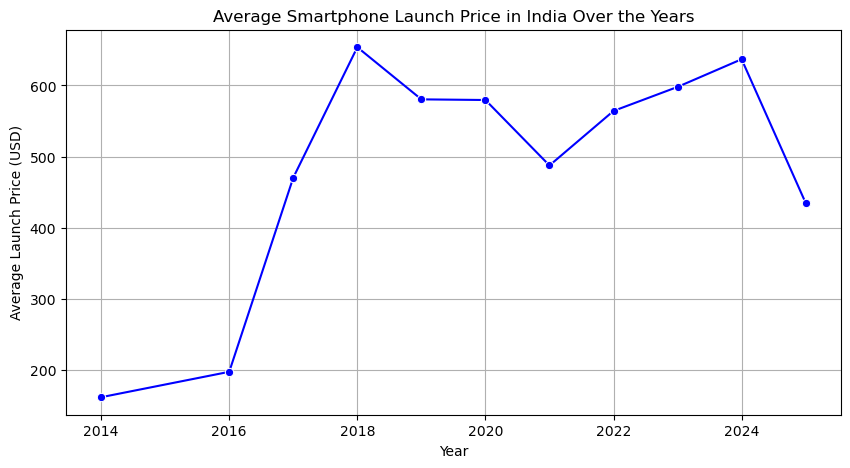

In [45]:

#Launch_Price = data.groupby("Launched Year")["P_India"].mean()
#print(Launch_Price)
#sns.lineplot(data=Launch_Price, x = "Launched Year", y = Launch_Price)
#plt.show() 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and calculate average price in India
Launch_Price = data.groupby("Launched Year")["P_India"].mean().reset_index()

# Print average price per year
print(Launch_Price)

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=Launch_Price, x="Launched Year", y="P_India", marker="o", linestyle="-", color="b")

# Formatting
plt.xlabel("Year")
plt.ylabel("Average Launch Price (USD)")
plt.title("Average Smartphone Launch Price in India Over the Years")
plt.grid(True)

# Show the plot
plt.show()


Launched Year
2014    161.557992
2016    197.292556
2017    470.314804
2018    653.671310
2019    580.362277
2020    579.453246
2021    487.429975
2022    564.085711
2023    597.862904
2024    636.780624
2025    434.687440
Name: P_India, dtype: float64


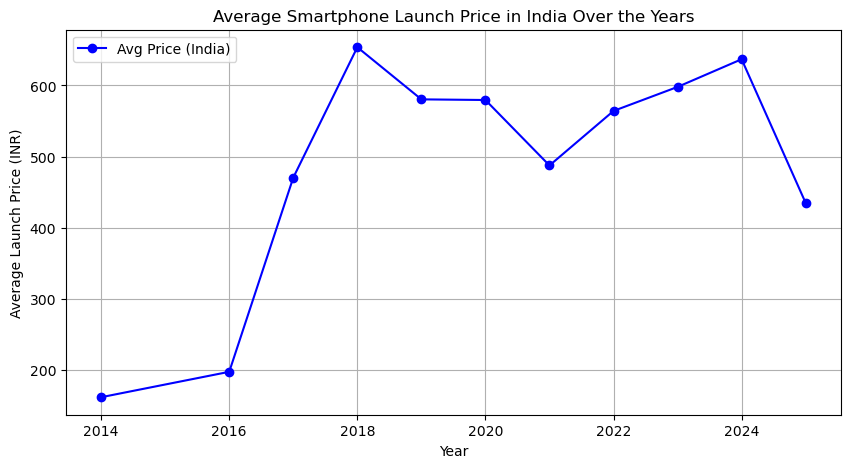

In [46]:
# Group by year and calculate the mean price
price_trends = data.groupby("Launched Year")["P_India"].mean()

# Display trends
print(price_trends)
# Plot the price trends
plt.figure(figsize=(10, 5))
plt.plot(price_trends.index, price_trends.values, marker="o", linestyle="-", color="b", label="Avg Price (India)")

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Average Launch Price (INR)")
plt.title("Average Smartphone Launch Price in India Over the Years")
plt.grid(True)
plt.legend()
plt.show()


**Brand Analysis**: Identify the top three brands with the highest average back camera resolution. What are the results?

In [49]:
# Convert the Front and Back camera values to integers
data["Front Camera (MP)"] = data["Front Camera (MP)"].str.replace('MP', '').str.replace(',', '').str.extract(r'(\d+)')[0].astype(int)
data["Back Camera (MP)"] = data["Back Camera (MP)"].str.replace('MP', '').str.replace(',', '').str.extract(r'(\d+)')[0].astype(int)
data.head()

,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inches),P_Pakistan,P_India,P_China,P_USA,P_Dubai,Launched Year
0,Apple,iPhone 16 128GB,174g,6.0,12,48,A17 Bionic,3600,6.1,805.005367,923.242931,799.862069,799.0,762.670300,2024
1,Apple,iPhone 16 256GB,174g,6.0,12,48,A17 Bionic,3600,6.1,840.783542,980.946336,841.241379,849.0,817.166213,2024
2,Apple,iPhone 16 512GB,174g,6.0,12,48,A17 Bionic,3600,6.1,876.561717,1038.649740,896.413793,899.0,871.662125,2024
3,Apple,iPhone 16 Plus 128GB,203g,6.0,12,48,A17 Bionic,4200,6.7,894.450805,1038.649740,855.034483,899.0,871.662125,2024
4,Apple,iPhone 16 Plus 256GB,203g,6.0,12,48,A17 Bionic,4200,6.7,930.228980,1096.353145,896.413793,949.0,926.158038,2024


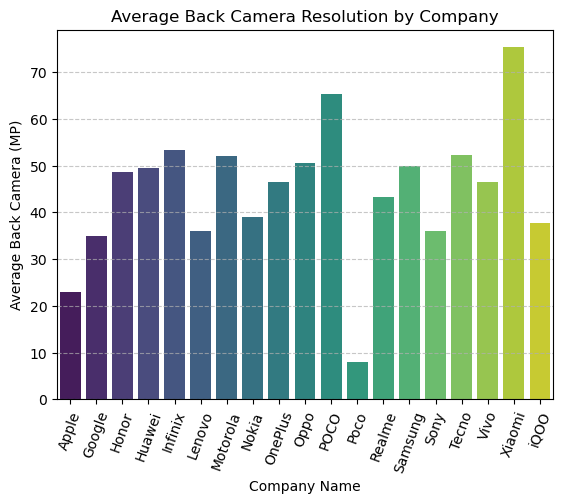

In [61]:
data_brand = data.groupby("Company Name" , as_index=False)["Back Camera (MP)"].mean()
#data_brand
#sns.countplot(data=data_brand, x="Company Name") 
#sns.histplot(data=data_brand, x="Company Name")
sns.barplot(data=data_brand, x="Company Name", y="Back Camera (MP)", palette="viridis", hue="Company Name")
# Formatting
plt.xticks(rotation=70)
plt.xlabel("Company Name")
plt.ylabel("Average Back Camera (MP)")
plt.title("Average Back Camera Resolution by Company")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

# top 3 Brand are Xiaomi, POCO & infinix

**Feature Correlation**: Compute the correlation between RAM size and launch price. Does a higher RAM generally correlate with a higher price?

In [67]:
countries_launch_prices = ["P_Pakistan"	,"P_India",	"P_China"	,"P_USA"	,"P_Dubai"]
#correlation = data["RAM (GB)"].corr(data["Launched Price (countries_launch_prices)"])
# Calculate the average launch price across the specified countries
data["Average_Launch_Price"] = data[countries_launch_prices].mean(axis=1)

# Calculate the correlation with the average launch price
average_correlation = data["RAM (GB)"].corr(data["Average_Launch_Price"])

print(f"Correlation between RAM (GB) and Average Launch Price: {average_correlation}")


Correlation between RAM (GB) and Average Launch Price: 0.3648768758667281


In [68]:
import matplotlib.pyplot as plt

# Plot the correlations
plt.figure(figsize=(10, 6))
plt.bar(correlations.keys(), correlations.values(), color='skyblue')
plt.title("Correlation between RAM (GB) and Launch Prices")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


NameError: name 'correlations' is not defined

<Figure size 1000x600 with 0 Axes>

**Processor Analysis**: Find the most commonly used processor among all smartphones. Which processor appears most frequently?

**Price Comparison Across Regions**: Select a smartphone model and compare its launch price across all available countries. Which country had the highest and lowest launch price?

**Trend Prediction**: Based on historical data, predict the launch price of a new smartphone with 8GB RAM, a 108MP back camera, a 5000mAh battery, and a 6.7-inch screen. What would be a reasonable estimate?

11. **Outlier Detection**: Identify any outliers in the dataset based on the launch price. What criteria would you use to detect and handle them?  

12. **Market Share Analysis**: Determine which company has released the most smartphone models in the dataset. What does this indicate about their market presence?  

13. **Yearly Analysis**: Find the year with the highest number of smartphone launches. What factors might have contributed to this peak?  

14. **Price vs. Features**: Compare the average price of smartphones with different RAM sizes. How does RAM influence pricing?  

15. **Battery Life Comparison**: Group smartphones by battery capacity range (e.g., <3000mAh, 3000-4000mAh, >4000mAh) and analyze their average launch price. Do phones with larger batteries tend to be more expensive?  

16. **Screen Size Evolution**: Plot the trend of average screen size over the years. Do you notice an increase in smartphone screen sizes over time?  

17. **Premium vs. Budget Phones**: Define a threshold for premium smartphones based on price and compare their average RAM, camera quality, and battery size with budget phones. What major differences do you find?  

18. **Camera Specifications Impact on Price**: Analyze whether a higher back camera resolution correlates with a higher launch price. What conclusions can you draw?  

19. **Regional Price Variation**: Select three different smartphone models and compare their launch prices in different countries. What factors could explain the price differences?  

20. **Predictive Analysis**: Build a simple machine learning model using the dataset to predict the launch price of a smartphone based on its specifications. What features have the most significant impact on pricing?  

Would you like **sample code** or a **detailed explanation** for any of these questions? 🚀